# Import required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
##Install hvplot, when google colab is used
!pip install hvplot 

     |████████████████████████████████| 3.0MB 2.8MB/s 
     |████████████████████████████████| 1.6MB 26.3MB/s 


In [ ]:
import hvplot as hv
import hvplot.pandas

# Data processing


In [ ]:
## Open the file, access the data
data=pd.read_csv("2015.csv") 
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [ ]:
## See the type of stored data in the certain columns
data["Happiness Score"].describe() 

count    158.000000
mean       5.375734
std        1.145010
min        2.839000
25%        4.526000
50%        5.232500
75%        6.243750
max        7.587000
Name: Happiness Score, dtype: float64

In [ ]:
data["Happiness Rank"].describe() 

count    158.000000
mean      79.493671
std       45.754363
min        1.000000
25%       40.250000
50%       79.500000
75%      118.750000
max      158.000000
Name: Happiness Rank, dtype: float64

In [ ]:
## Get statistics of each column in the dataframe
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [ ]:
#clculate mean and max values
data["Freedom"].mean()

0.4286149367088611

In [ ]:
data["Freedom"].max()

0.66973

In [ ]:
##rename columns
data=data.rename(columns={"Economy (GDP per Capita)": "GDP", "Trust (Government Corruption)": "Trust", "Health (Life Expectancy)":"Health"})
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,GDP,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# Illustrating data

In [ ]:
##sort values in columns by certain order
data.sort_values(by="Health", ascending=False )

,Country,Region,Happiness Rank,Happiness Score,Standard Error,GDP,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
23,Singapore,Southeastern Asia,24,6.798,0.03780,1.52186,1.02000,1.02525,0.54252,0.49210,0.31105,1.88501
71,Hong Kong,Eastern Asia,72,5.474,0.05051,1.38604,1.05818,1.01328,0.59608,0.37124,0.39478,0.65429
45,Japan,Eastern Asia,46,5.987,0.03581,1.27074,1.25712,0.99111,0.49615,0.18060,0.10705,1.68435
46,South Korea,Eastern Asia,47,5.984,0.04098,1.24461,0.95774,0.96538,0.33208,0.07857,0.18557,2.21978
35,Spain,Western Europe,36,6.329,0.03468,1.23011,1.31379,0.95562,0.45951,0.06398,0.18227,2.12367
...,...,...,...,...,...,...,...,...,...,...,...,...
96,Lesotho,Sub-Saharan Africa,97,4.898,0.09438,0.37545,1.04103,0.07612,0.31767,0.12504,0.16388,2.79832
100,Swaziland,Sub-Saharan Africa,101,4.867,0.08742,0.71206,1.07284,0.07566,0.30658,0.03060,0.18259,2.48676
147,Central African Republic,Sub-Saharan Africa,148,3.678,0.06112,0.07850,0.00000,0.06699,0.48879,0.08289,0.23835,2.72230
127,Botswana,Sub-Saharan Africa,128,4.332,0.04934,0.99355,1.10464,0.04776,0.49495,0.12474,0.10461,1.46181


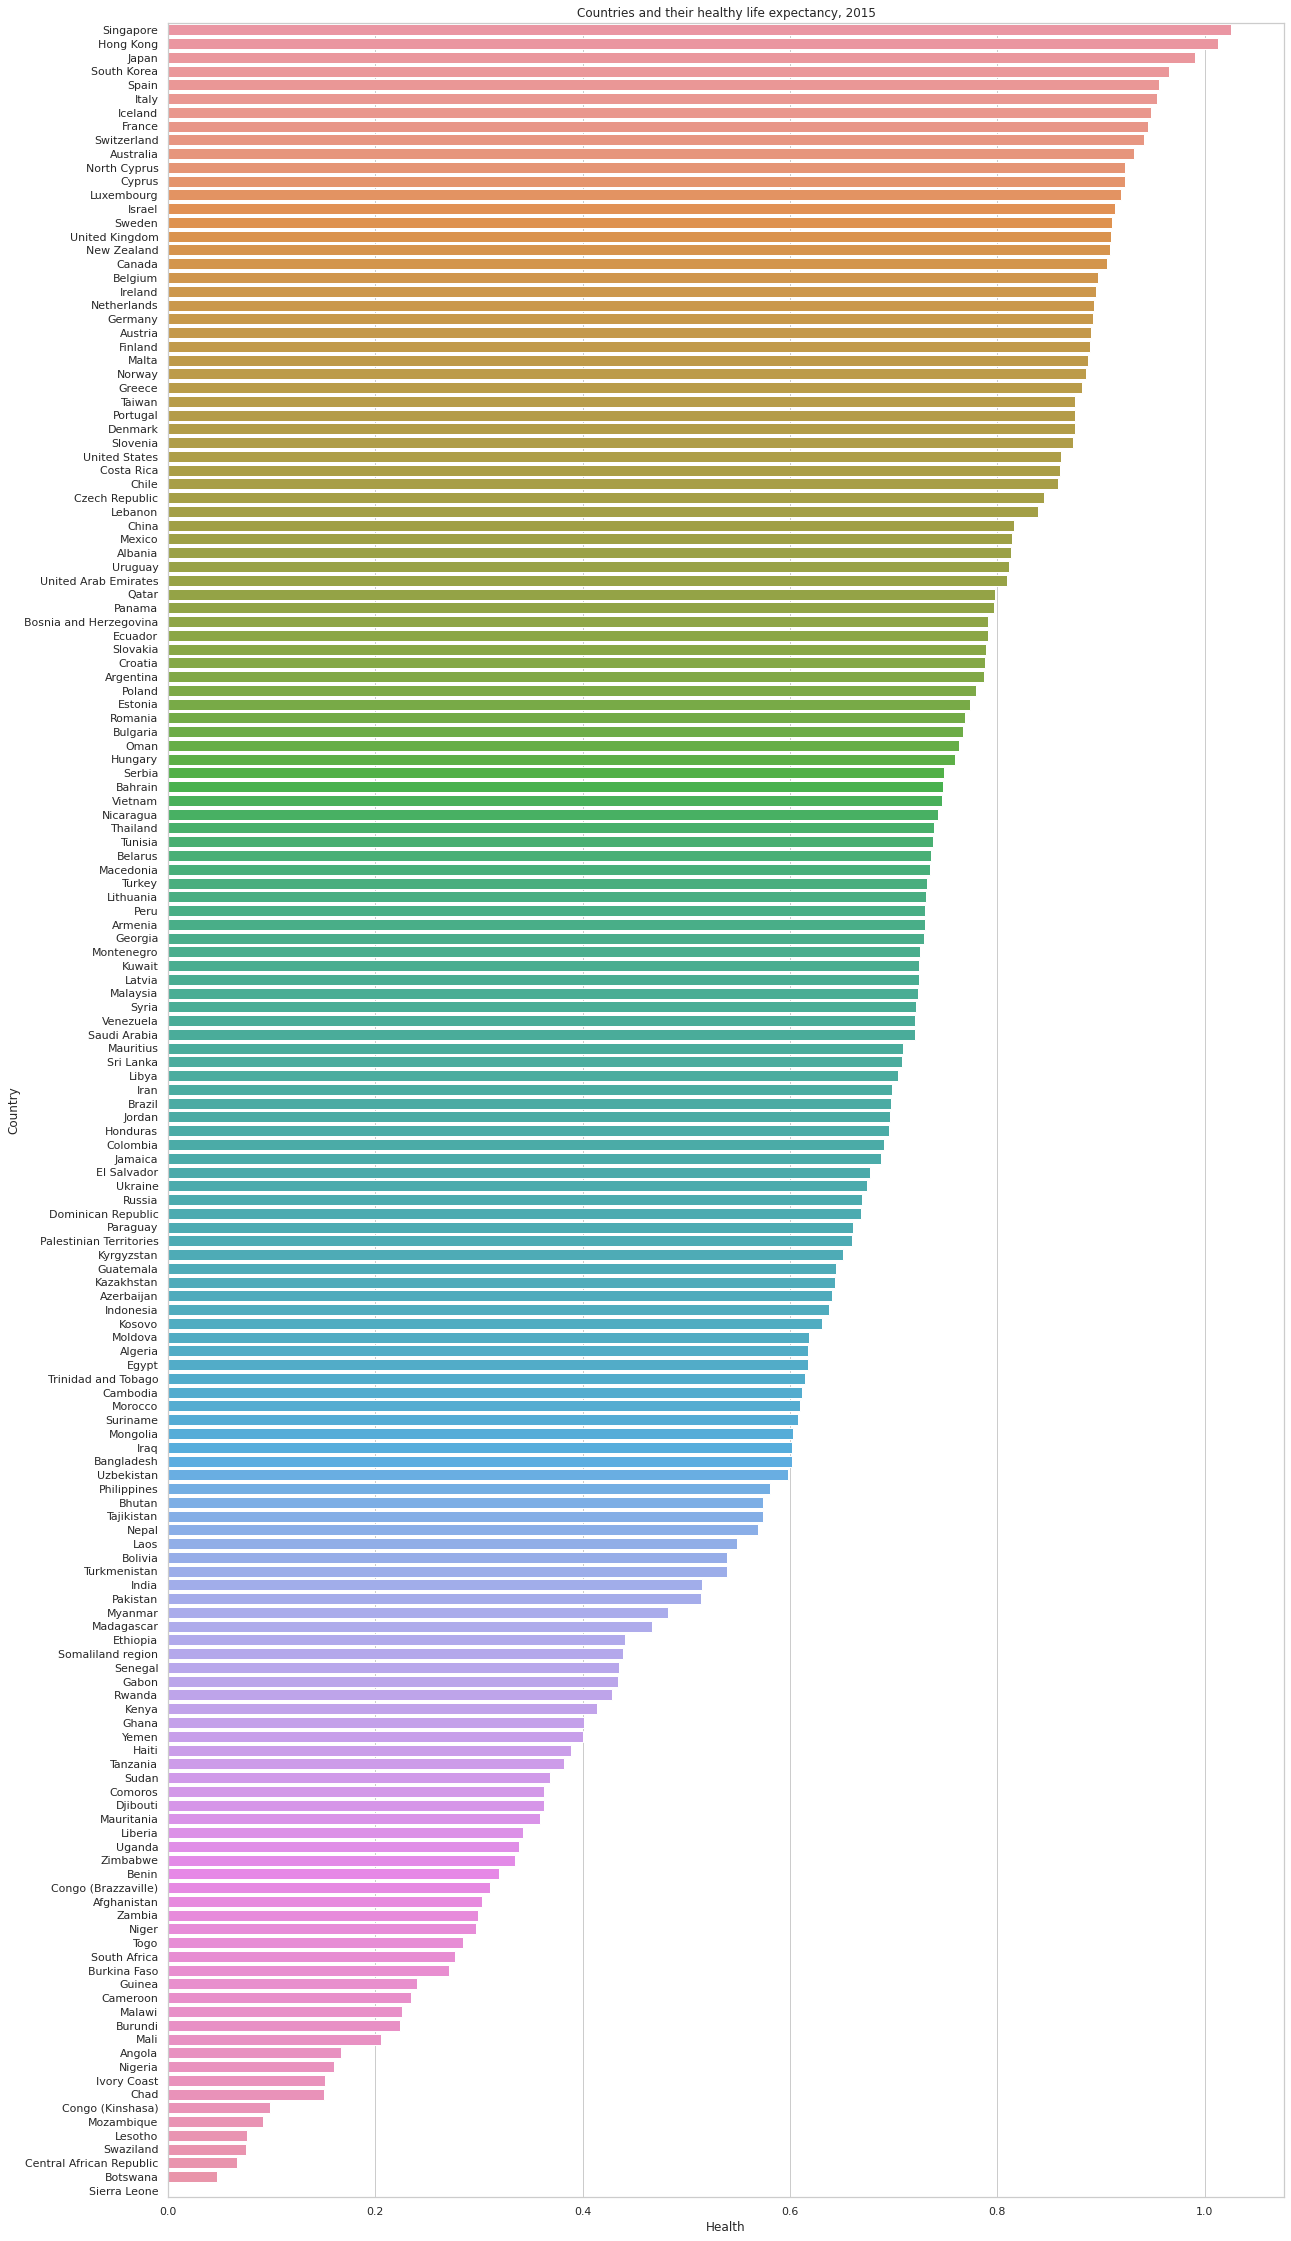

In [ ]:
## plot of health score for each country in 2015 with barplot from seaborn
from pylab import rcParams 

data=data.sort_values(by="Health", ascending=False)
sns.set(style="whitegrid")
rcParams["figure.figsize"] = 20, 40
sns.barplot(data=data, x="Health", y="Country").set_title("Countries and their healthy life expectancy, 2015")

In [ ]:
## upload the dataframe which assigns each country to certain continent
url = "http://techslides.com/list-of-countries-and-capitals"
country_data=pd.read_html(url, header=0)[0]
country_data

,Country Name,Capital Name,Capital Latitude,Capital Longitude,Country Code,Continent Name
0,Afghanistan,Kabul,34.516667,69.183333,AF,Asia
1,Aland Islands,Mariehamn,60.116667,19.900000,AX,Europe
2,Albania,Tirana,41.316667,19.816667,AL,Europe
3,Algeria,Algiers,36.750000,3.050000,DZ,Africa
4,American Samoa,Pago Pago,-14.266667,-170.700000,AS,Australia
...,...,...,...,...,...,...
240,Wallis and Futuna,Mata-Utu,-13.950000,-171.933333,WF,Australia
241,Western Sahara,El-AaiÃºn,27.153611,-13.203333,EH,Africa
242,Yemen,Sanaa,15.350000,44.200000,YE,Asia
243,Zambia,Lusaka,-15.416667,28.283333,ZM,Africa


In [ ]:
data=pd.merge(data, country_data,  left_on="Country", right_on="Country Name")
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,GDP,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Country Name,Capital Name,Capital Latitude,Capital Longitude,Country Code,Continent Name
0,Singapore,Southeastern Asia,24,6.798,0.03780,1.52186,1.02000,1.02525,0.54252,0.49210,0.31105,1.88501,Singapore,Singapore,1.283333,103.850000,SG,Asia
1,Hong Kong,Eastern Asia,72,5.474,0.05051,1.38604,1.05818,1.01328,0.59608,0.37124,0.39478,0.65429,Hong Kong,NaN,0.000000,0.000000,HK,Asia
2,Japan,Eastern Asia,46,5.987,0.03581,1.27074,1.25712,0.99111,0.49615,0.18060,0.10705,1.68435,Japan,Tokyo,35.683333,139.750000,JP,Asia
3,South Korea,Eastern Asia,47,5.984,0.04098,1.24461,0.95774,0.96538,0.33208,0.07857,0.18557,2.21978,South Korea,Seoul,37.550000,126.983333,KR,Asia
4,Spain,Western Europe,36,6.329,0.03468,1.23011,1.31379,0.95562,0.45951,0.06398,0.18227,2.12367,Spain,Madrid,40.400000,-3.683333,ES,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Lesotho,Sub-Saharan Africa,97,4.898,0.09438,0.37545,1.04103,0.07612,0.31767,0.12504,0.16388,2.79832,Lesotho,Maseru,-29.316667,27.483333,LS,Africa
148,Swaziland,Sub-Saharan Africa,101,4.867,0.08742,0.71206,1.07284,0.07566,0.30658,0.03060,0.18259,2.48676,Swaziland,Mbabane,-26.316667,31.133333,SZ,Africa
149,Central African Republic,Sub-Saharan Africa,148,3.678,0.06112,0.07850,0.00000,0.06699,0.48879,0.08289,0.23835,2.72230,Central African Republic,Bangui,4.366667,18.583333,CF,Africa
150,Botswana,Sub-Saharan Africa,128,4.332,0.04934,0.99355,1.10464,0.04776,0.49495,0.12474,0.10461,1.46181,Botswana,Gaborone,-24.633333,25.900000,BW,Africa


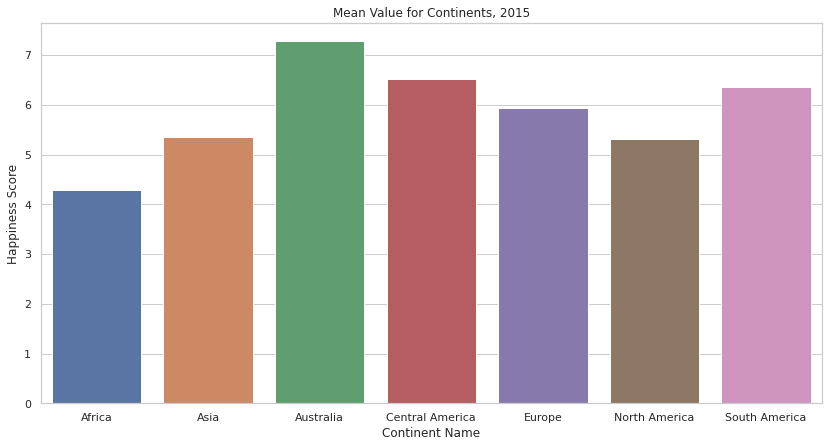

In [ ]:
##calculate and plot mean of Happiness Score for all continents using grpoupby function in 2015
data_continent=data.groupby("Continent Name")["Happiness Score"].mean().to_frame().reset_index()
rcParams["figure.figsize"] = 14, 7
sns.barplot(data=data_continent, x="Continent Name", y="Happiness Score").set_title("Mean Value for Continents, 2015");

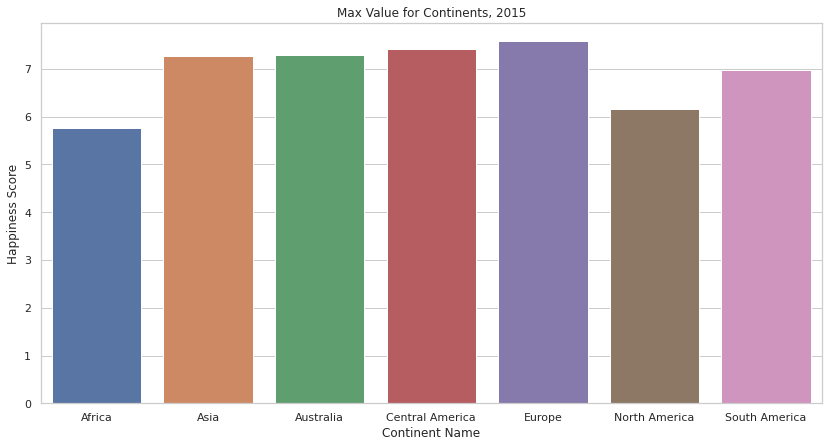

In [ ]:
##calculate and plot max value of Happiness Score for each continent in 2015
data_continent=data.groupby("Continent Name")["Happiness Score"].max().to_frame().reset_index()
sns.barplot(data=data_continent, x="Continent Name", y="Happiness Score").set_title("Max Value for Continents, 2015");

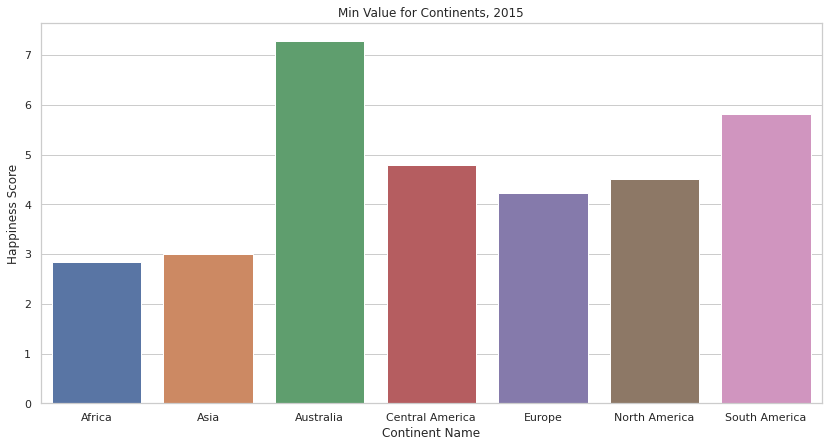

In [ ]:
##calculate and plot minimum value of Happiness Score for each continent in 2015
data_continent=data.groupby("Continent Name")["Happiness Score"].min().to_frame().reset_index()
sns.barplot(data=data_continent, x="Continent Name", y="Happiness Score").set_title("Min Value for Continents, 2015");

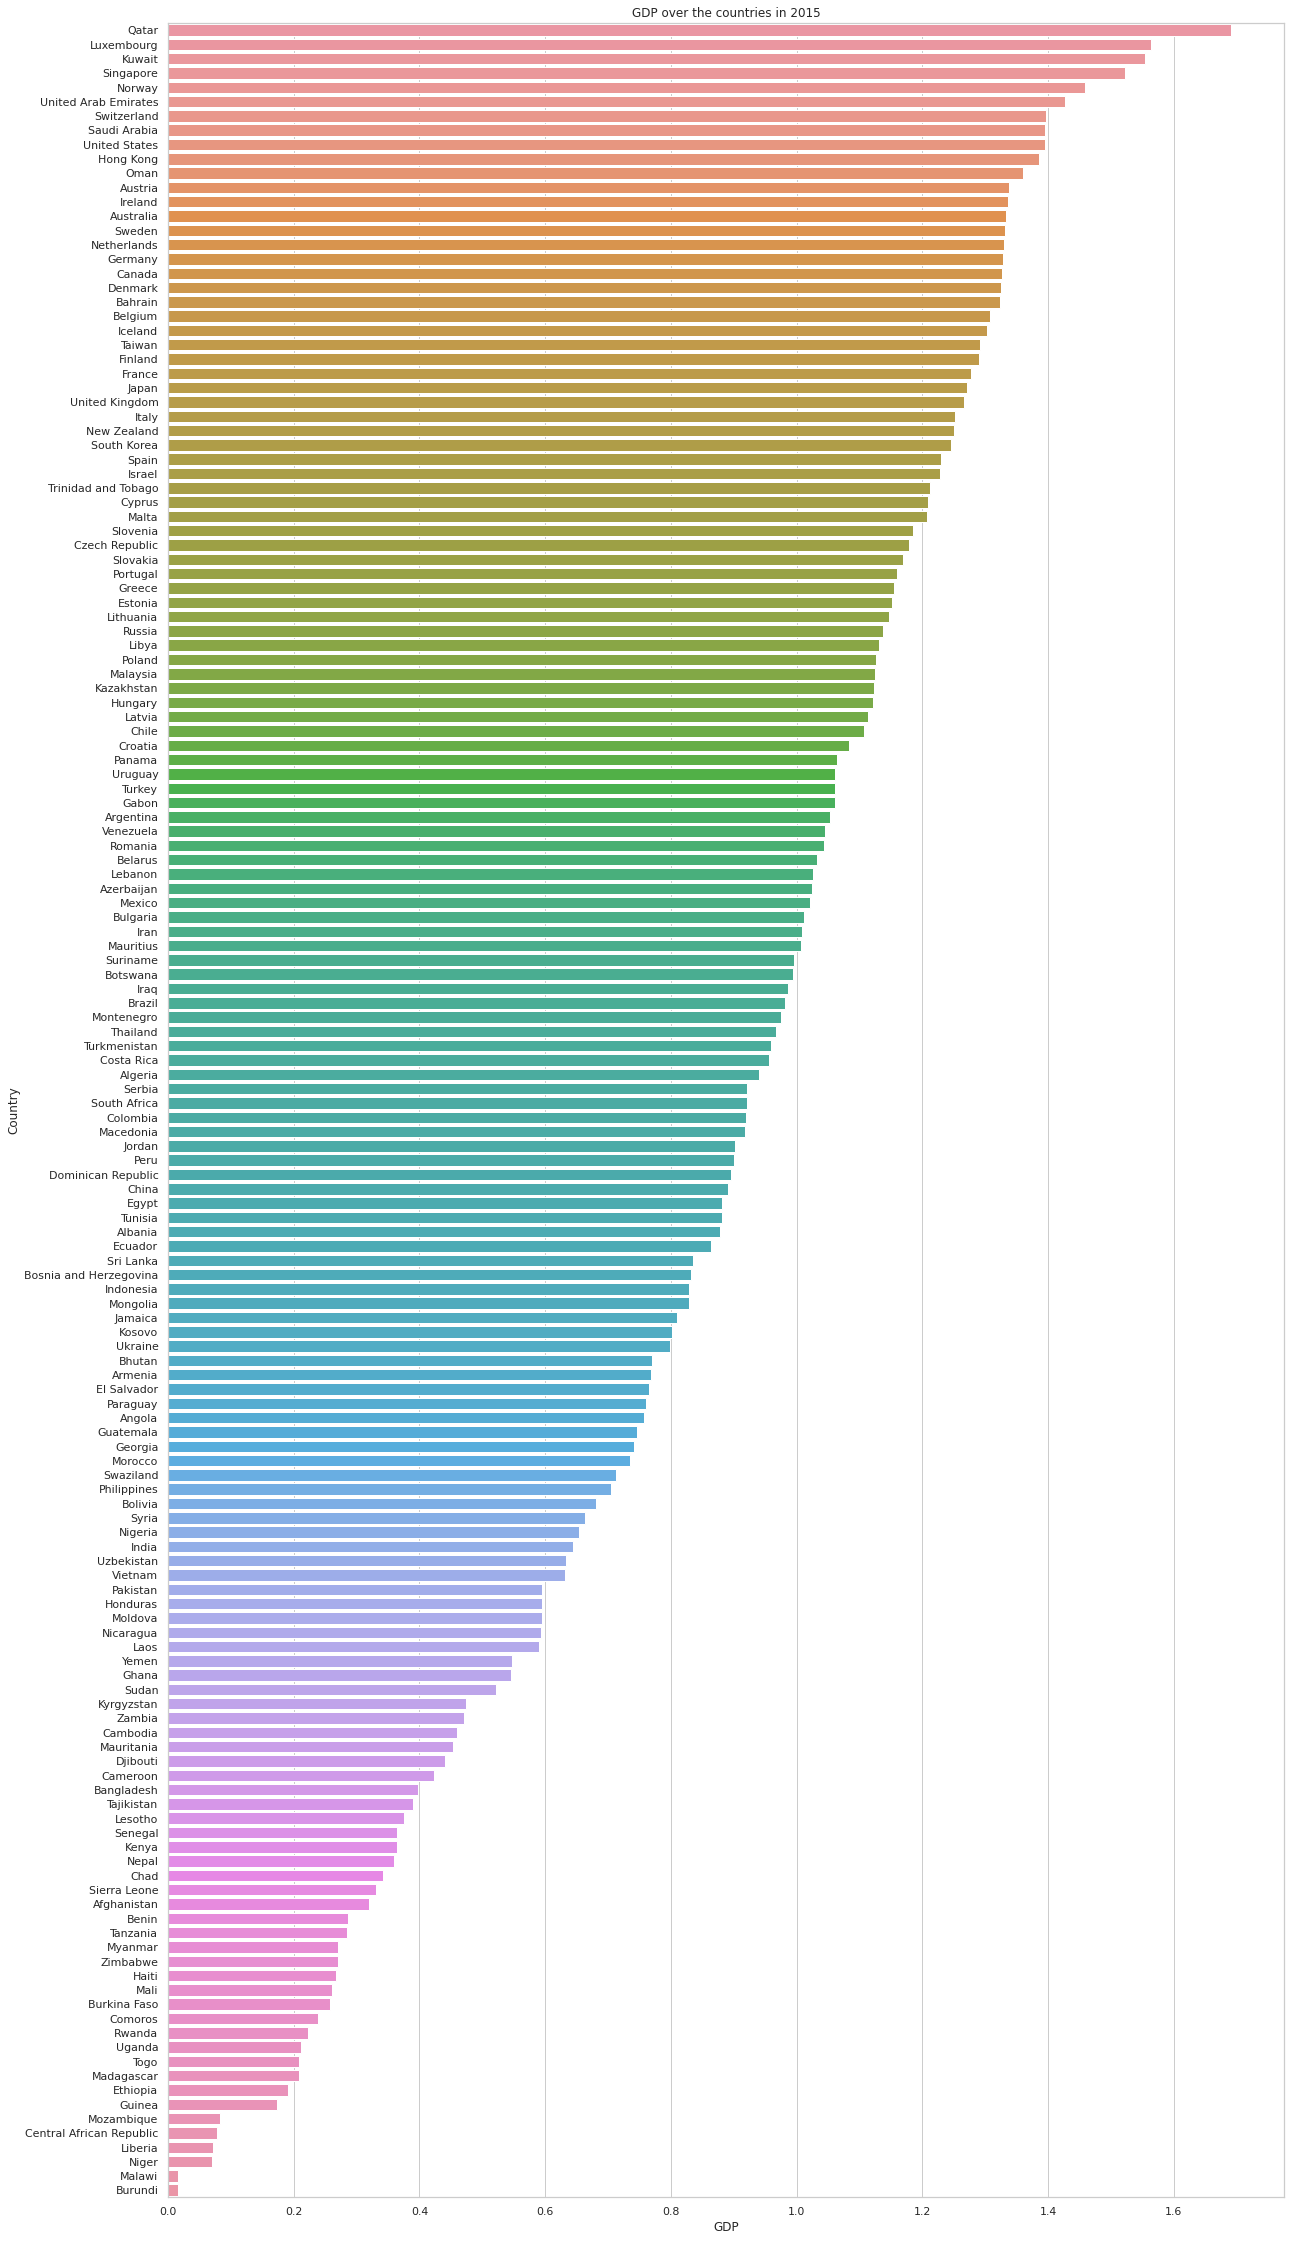

In [ ]:
## plot GDP for all countries in 2015
data=data.sort_values(by="GDP", ascending=False )
sns.set(style="whitegrid")
rcParams["figure.figsize"] = 20, 40
sns.barplot(data=data, x="GDP", y="Country").set_title("GDP over the countries in 2015");

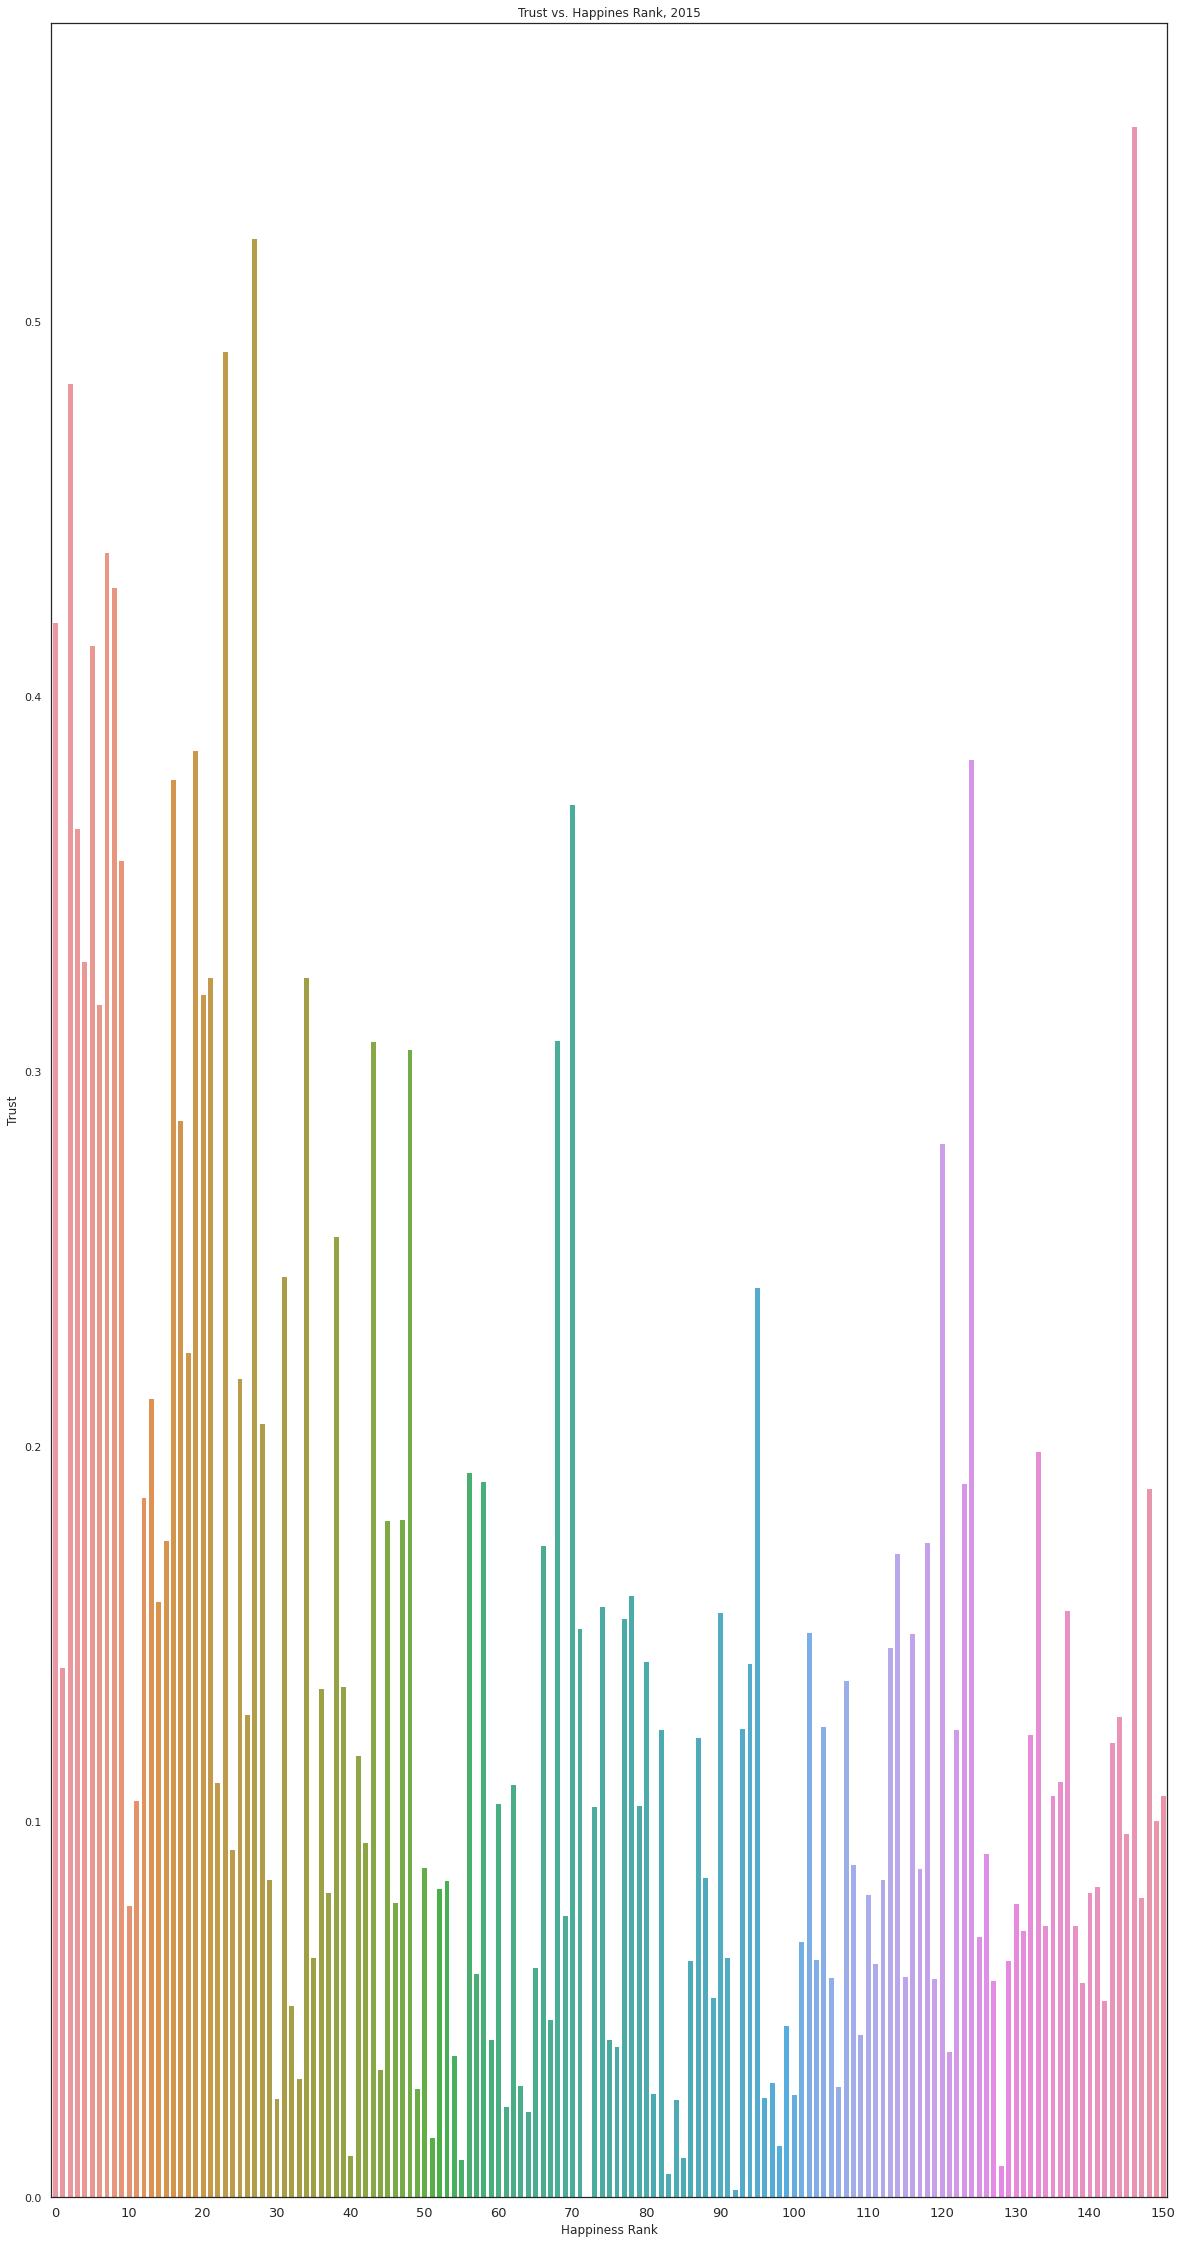

In [ ]:
## plot of Trust from Happiness Rank for all countries in 2015
data=data.sort_values(by="Trust", ascending=False)
fig, ax = plt.subplots()
plot=sns.barplot(data=data, y="Trust", x="Happiness Rank").set_title("Trust vs. Happines Rank, 2015")
ax.set_xticks([0,10,20,30, 40, 50, 60, 70, 80, 90, 100, 110,120,130,140, 150])
ax.set_xticklabels(["0","10","20","30", "40","50","60","70", "80","90", "100", "110", "120", "130", "140","150"], size=13);

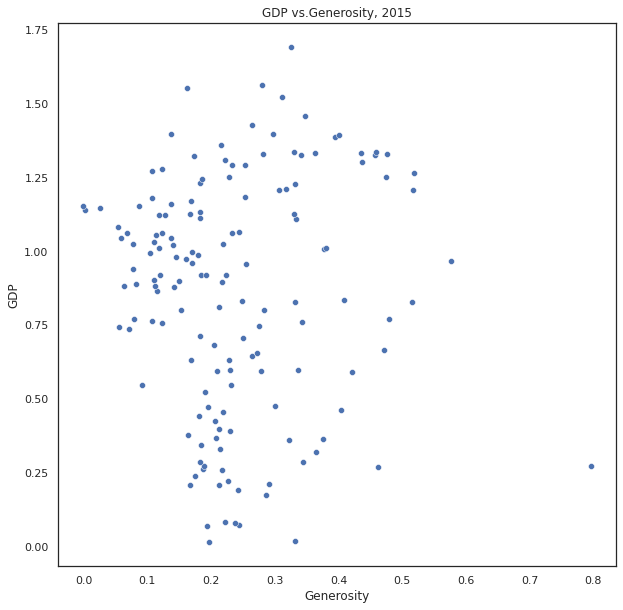

In [ ]:
##Plot the dependece of GDP from Generosity in 2015
data=data.sort_values(by="GDP", ascending=True)
rcParams["figure.figsize"]=10,10
sns.scatterplot(data=data, x="Generosity", y="GDP").set_title("GDP vs.Generosity, 2015");



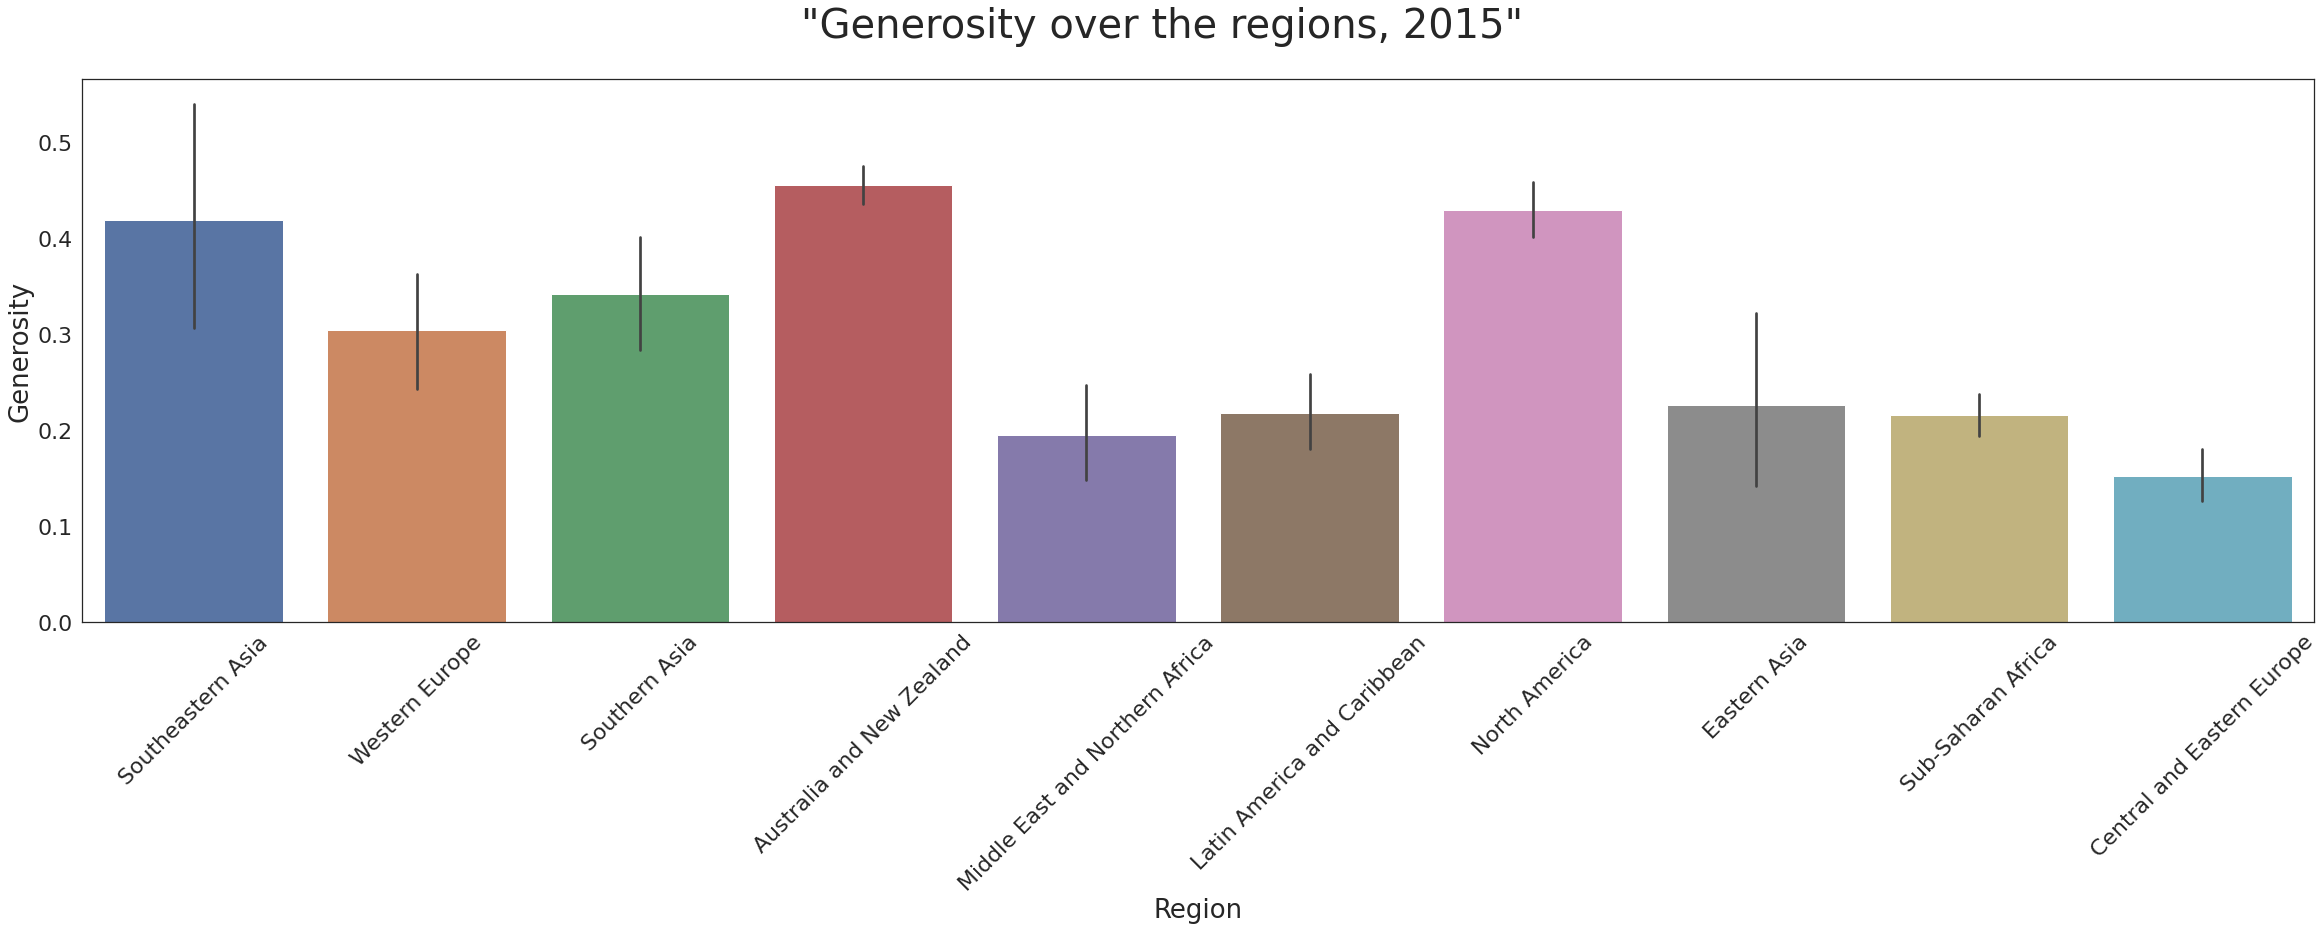

In [ ]:
##Plot Generosity for each continent in 2015
data=data.sort_values(by="Generosity", ascending=False)
rcParams["figure.figsize"]=40,10
plt.rcParams['xtick.labelsize']=22
plt.rcParams['ytick.labelsize']=22
plt.xticks(rotation=45)
plt.xlabel('x-axis', fontsize=26)
plt.ylabel('y-axis', fontsize=26)
plt.suptitle('"Generosity over the regions, 2015"', fontsize=40)
sns.barplot(data=data, x="Region", y="Generosity");

In [ ]:
##save the formated data to new csv file
 data.to_csv(index=False)

# Merging Tables for all years

In [ ]:
##load the data and rename columns for all other years
data2016=pd.read_csv("2016.csv")
data2016=data2016.rename(columns={"Happiness Score": "Happiness Score2016"})
data2017=pd.read_csv("2017.csv")
data2017=data2017.rename(columns={"Happiness.Score": "Happiness Score2017"})
data2018=pd.read_csv("2018.csv")
data2018=data2018.rename(columns={"Country or region": "Country", "Score":"Happiness Score2018"})
data2019=pd.read_csv("2019.csv")
data2019=data2019.rename(columns={"Country or region": "Country", "Score":"Happiness Score2019"})
data2016.head(3)

In [ ]:
url = "http://techslides.com/list-of-countries-and-capitals"
country_data=pd.read_html(url, header=0)[0]
country_data

In [ ]:
##merge all tables for all years
data16=pd.merge(data2016, country_data,  left_on="Country", right_on="Country Name")
data17=pd.merge(data2017, country_data,  left_on="Country", right_on="Country Name")
data18=pd.merge(data2018, country_data,  left_on="Country", right_on="Country Name")
data19=pd.merge(data2019, country_data,  left_on="Country", right_on="Country Name")
data17


In [ ]:
##mean Happiness Score for all continents for all years
data_continent2016=data16.groupby("Continent Name")["Happiness Score2016"].mean().to_frame().reset_index()
data_continent2017=data17.groupby("Continent Name")["Happiness Score2017"].mean().to_frame().reset_index()
data_continent2018=data18.groupby("Continent Name")["Happiness Score2018"].mean().to_frame().reset_index()
data_continent2019=data19.groupby("Continent Name")["Happiness Score2019"].mean().to_frame().reset_index()
data_continent2016
data_all_years=data_continent2016.merge(data_continent2017, left_on="Continent Name", right_on="Continent Name").merge(data_continent2018, left_on="Continent Name", right_on="Continent Name").merge(data_continent2019, left_on="Continent Name", right_on="Continent Name")
data_all_years.plot(x="Continent Name", y=["Happiness Score2016", "Happiness Score2017", "Happiness Score2018", "Happiness Score2019"], kind="bar")
plt.title("Mean Happiness Score, 2015-2019", fontsize=46)
plt.rcParams['legend.fontsize'] = 16;


In [ ]:
## Mean Happiness Score fr Europa and North America for all years
data_all_years[4:6].plot(x="Continent Name", y=["Happiness Score2016", "Happiness Score2017", "Happiness Score2018", "Happiness Score2019"], kind="bar")
plt.title("Mean Happiness Score for Europe and North America, 2015-2019", fontsize=46);
plt.rcParams['legend.fontsize'] = 20;